In [35]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import os
import numpy as np



In [2]:
## to download datset directly from kaggle:

# !kaggle competitions download -c dogs-vs-cats
# import zipfile
# zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [7]:
train_ds = image_dataset_from_directory(
    directory='./cat_vs_dog_dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = image_dataset_from_directory(
    directory='./cat_vs_dog_dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 200 files belonging to 2 classes.


Found 100 files belonging to 2 classes.


In [71]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Data Preprocessing:
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [57]:
# Building CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


/workspaces/Introduction-to-CNN/venv-CNN/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

None


In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5349 - loss: 4.5555 - val_accuracy: 0.5000 - val_loss: 36.5079
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7766 - loss: 1.5431 - val_accuracy: 0.5800 - val_loss: 7.4877
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7538 - loss: 2.6494 - val_accuracy: 0.5300 - val_loss: 6.1780
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8346 - loss: 1.1086 - val_accuracy: 0.5200 - val_loss: 4.0986
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8686 - loss: 0.6742 - val_accuracy: 0.5200 - val_loss: 7.6418
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9172 - loss: 0.4233 - val_accuracy: 0.5300 - val_loss: 3.1250
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9095 - loss: 0.3662 - val_accuracy: 0.5700 - val_loss: 2.3167
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9443 - loss: 0.2486 - val_accuracy: 0.5800 - val_loss: 2.2908
Epoch 9

In [59]:
model.save("./trained_model/best.keras")
print("Saved model to disk")

Saved model to disk


In [45]:
# model = load_model('./trained_model/best.keras')

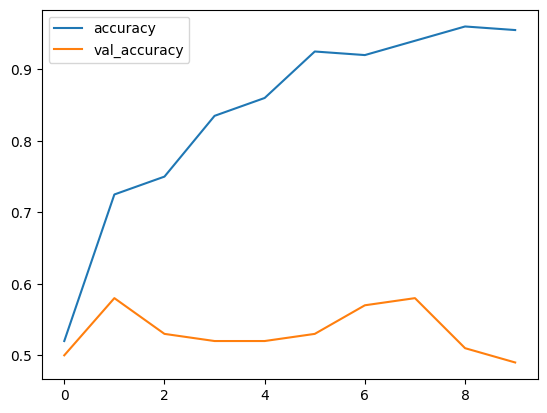

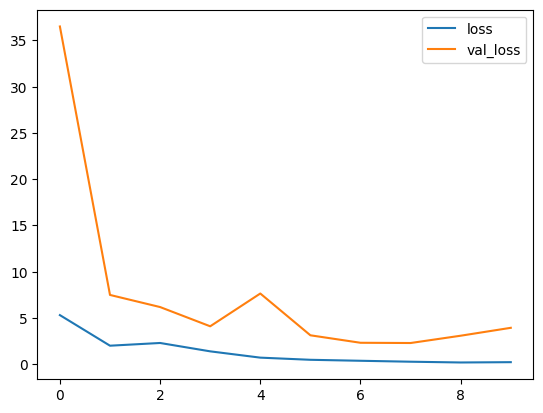

In [60]:
#Visualise model performance
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()

In [61]:
test_acc, test_loss = history_df[['val_accuracy','val_loss']].max().tolist()
print(f"Test Accuracy: {test_acc*100:.3f}")
print(f"Test Loss: {test_loss*100:.3f}")

Test Accuracy: 58.000
Test Loss: 3650.789


In [62]:
## Prediction on one test image
test_img = cv2.imread('./cat_vs_dog_dataset/validation/dog/dog.1001.jpg')
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[0.87745047]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


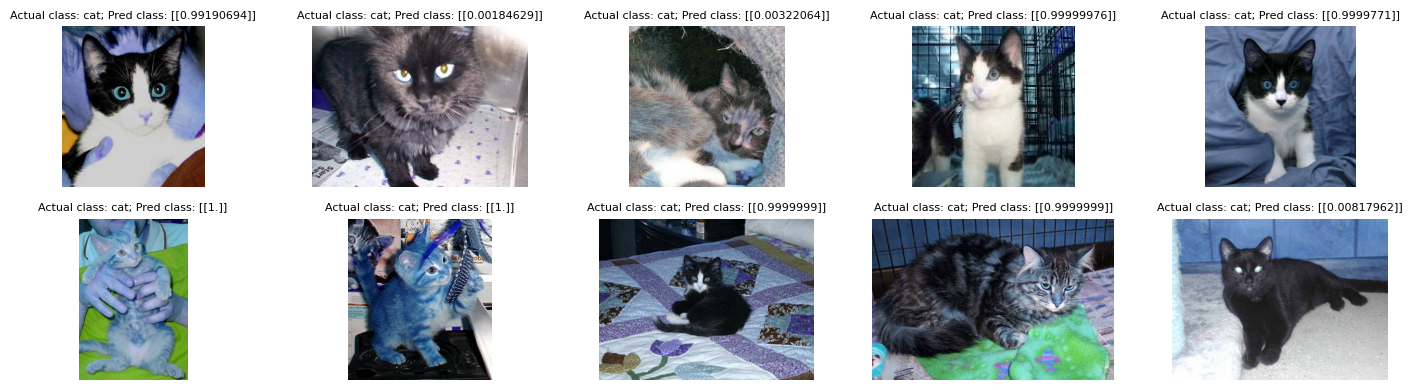

In [68]:
folder_path = './cat_vs_dog_dataset/validation/cat'

files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
image_files = [f for f in files[:10] if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

num_cols = 5  # Number of columns in the plot grid
num_rows = 2 # Calculate number of rows needed

fig, axes = plt.subplots(2, 5,figsize=(15, num_rows*2)) 

for img, ax in zip(image_files, axes.flat):
    img_path = os.path.join(folder_path, img)
    image = cv2.imread(img_path)
    test_img = cv2.resize(image, (256,256))
    test_input = test_img.reshape((1, 256, 256, 3))
    if model.predict(test_input)>= 0.9:
        res = 'Dog'
    else:
        res = 'Cat'
    ax.imshow(image)
    ax.axis('off')
    
    ax.set_title(f"Actual class: {img.split('.')[0]}; Pred class: {model.predict(test_input)}", fontsize = 8)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


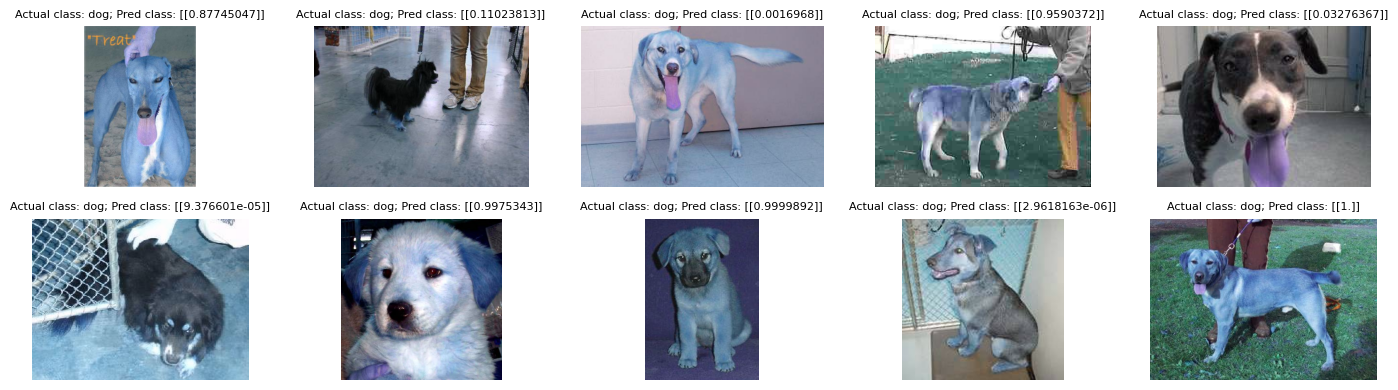

In [67]:
folder_path = './cat_vs_dog_dataset/validation/dog'

files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
image_files = [f for f in files[:10] if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

num_cols = 5  # Number of columns in the plot grid
num_rows = 2 # Calculate number of rows needed

fig, axes = plt.subplots(2, 5,figsize=(15, num_rows*2)) 

for img, ax in zip(image_files, axes.flat):
    img_path = os.path.join(folder_path, img)
    image = cv2.imread(img_path)
    test_img = cv2.resize(image, (256,256))
    test_input = test_img.reshape((1, 256, 256, 3))
    if model.predict(test_input)>= 0.9:
        res = 'Dog'
    else:
        res = 'Cat'
    ax.imshow(image)
    ax.axis('off')
    
    ax.set_title(f"Actual class: {img.split('.')[0]}; Pred class: {model.predict(test_input)}", fontsize = 8)
    plt.tight_layout()